Data Preprocessing

In [86]:
!pip install seaborn

In [87]:
!pip install dash

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 837.5 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/7.8 MB 837.5 kB/s eta 0:00:09
   ---- ----------------------------------- 0.8/7.8 MB 762.0 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/7.8 MB 751.1 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/7.8 MB 808.5 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/7.8 MB 808.5 kB/s eta 0:00:09
   -------- ------------------------------- 1.6/7.8 MB 822.3 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/7.8 MB 824.8 kB/s eta 0:00:08
   ---------- -----------------

In [88]:
!pip install pandas networkx matplotlib ipywidgets

In [89]:
#Importing Packages
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px





Uploading the Dataset

In [45]:
urls=['https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1975_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1979_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1983_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1987_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1992_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1996_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1999_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2003_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2007_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2011_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2015_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2019_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2023_Match_Stats.csv'
      ]
#csv_files=[pd.read_csv(url) for url in urls]
#csv_files
crick_df = pd.concat([pd.read_csv(url) for url in urls], ignore_index=True)

crick_df.head()

,Unnamed: 0.1,Unnamed: 0,date,venue,match_category,team_1,team_2,team_1_runs,team_1_wickets,team_2_runs,team_2_wickets,result,pom,best_batters,best_bowlers,commentary_line,world_cup_year,host_country
0,0,11,NaN,Nottingham,League-Match,PAK,SL,330.0,6.0,138.0,0.0,Pakistan won by 192 runs,Zaheer Abbas,NaN,NaN,NaN,1975,England
1,1,5,NaN,Leeds,League-Match,EAf,IND,120.0,0.0,123.0,0.0,India won by 10 wickets (with 181 balls remain...,Farokh Engineer,NaN,NaN,NaN,1975,England
2,2,12,1975-06-18,Leeds,Semi-Final,ENG,AUS,93.0,0.0,94.0,6.0,Australia won by 4 wickets (with 188 balls rem...,Gary Gilmour,NaN,NaN,NaN,1975,England
3,3,8,1975-06-14,Birmingham,League-Match,ENG,EAf,290.0,5.0,94.0,0.0,England won by 196 runs,John Snow,NaN,NaN,NaN,1975,England
4,4,13,NaN,The Oval,Semi-Final,NZ,WI,158.0,0.0,159.0,5.0,West Indies won by 5 wickets (with 119 balls r...,Alvin Kallicharran,NaN,NaN,NaN,1975,England


Examining the DataFrame

In [46]:
crick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     528 non-null    int64  
 1   Unnamed: 0       528 non-null    int64  
 2   date             364 non-null    object 
 3   venue            528 non-null    object 
 4   match_category   528 non-null    object 
 5   team_1           528 non-null    object 
 6   team_2           528 non-null    object 
 7   team_1_runs      518 non-null    float64
 8   team_1_wickets   518 non-null    float64
 9   team_2_runs      513 non-null    float64
 10  team_2_wickets   513 non-null    float64
 11  result           528 non-null    object 
 12  pom              510 non-null    object 
 13  best_batters     250 non-null    object 
 14  best_bowlers     250 non-null    object 
 15  commentary_line  83 non-null     object 
 16  world_cup_year   528 non-null    int64  
 17  host_country    

In [47]:
crick_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'venue', 'match_category',
       'team_1', 'team_2', 'team_1_runs', 'team_1_wickets', 'team_2_runs',
       'team_2_wickets', 'result', 'pom', 'best_batters', 'best_bowlers',
       'commentary_line', 'world_cup_year', 'host_country'],
      dtype='object')

In [48]:
print(crick_df.shape)

(528, 18)


In [49]:
crick_df.describe()

,Unnamed: 0.1,Unnamed: 0,team_1_runs,team_1_wickets,team_2_runs,team_2_wickets,world_cup_year
count,528.000000,528.000000,518.000000,518.000000,513.000000,513.000000,528.000000
mean,21.871212,21.034091,243.239382,4.590734,198.643275,2.777778,2003.373106
std,14.307231,13.915398,75.108565,3.465005,59.732864,3.044163,13.352007
min,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,1975.000000
25%,10.000000,9.000000,197.000000,0.000000,158.000000,0.000000,1992.000000
50%,20.000000,20.000000,244.000000,6.000000,204.000000,2.000000,2003.000000
75%,33.000000,32.000000,292.000000,8.000000,235.000000,5.000000,2015.000000
max,55.000000,53.000000,428.000000,9.000000,383.000000,9.000000,2023.000000


Data Cleaning

In [50]:

# Removing duplicate rows from the DataFrame
crick_df = crick_df.drop_duplicates()

# Resetting the index after removing duplicates
crick_df.reset_index(drop=True, inplace=True)

# Checking the shape of the DataFrame after removing duplicates
print(f"DataFrame shape after removing duplicates: {crick_df.shape}")

DataFrame shape after removing duplicates: (528, 18)


Removing Unnecessary Columns

Since the columns named 'Unnamed: 0.1','Unnamed: 0' don't have any specific meaning, we removed those columns.
Since the columns named 'commentary_line','date' aren't relevent for the data analysis, we removed those columns.

In [51]:
# Removing unnessary colummuns
crick_df = crick_df.drop(columns=['date','Unnamed: 0.1','Unnamed: 0','commentary_line'])


In [52]:
# checking null values
print(crick_df.isnull().sum())

venue               0
match_category      0
team_1              0
team_2              0
team_1_runs        10
team_1_wickets     10
team_2_runs        15
team_2_wickets     15
result              0
pom                18
best_batters      278
best_bowlers      278
world_cup_year      0
host_country        0
dtype: int64


In [53]:
print(crick_df.shape)

(528, 14)


Checking for outliers

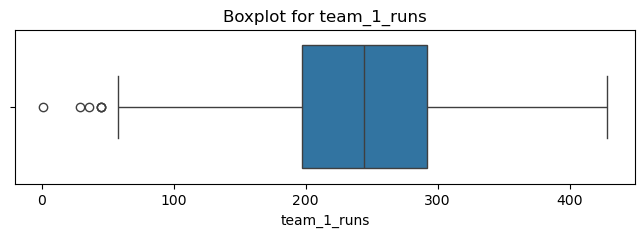

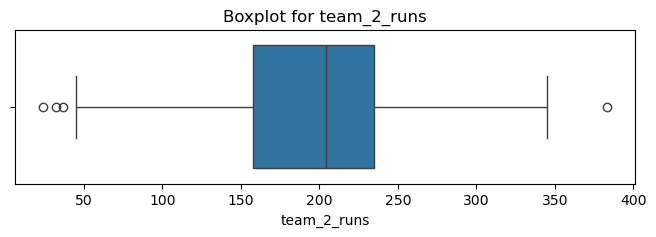

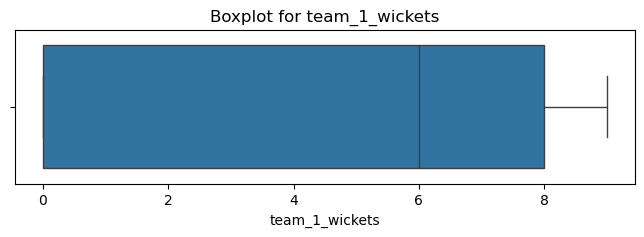

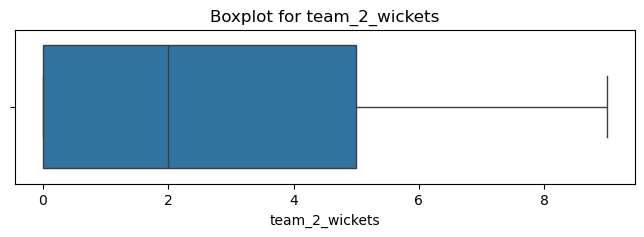

In [54]:


# Identify numerical columns
numerical_cols = ['team_1_runs', 'team_2_runs', 'team_1_wickets', 'team_2_wickets']

# Plot boxplots to visualize potential outliers
for col in numerical_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=crick_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

Checking for the rows with extreme values

Since the highest and lowest values of this dataset has a specific meaning according to the real scenario, we are going to check for extremely unrealistic values instead of following the normal ways like below.
1. considering the IQR
2. using the Boxplot

In [55]:
# Filter rows where team_1_runs > 400
high_scoring_matches_1 = crick_df[crick_df['team_1_runs'] > 400]

# Display the filtered rows
print(high_scoring_matches_1)

              venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
323   Port of Spain   League-Match    IND    BER        413.0             5.0   
387           Perth   League-Match    AUS    AFG        417.0             6.0   
406          Sydney   League-Match     SA     WI        408.0             5.0   
414        Canberra   League-Match     SA    IRE        411.0             4.0   
479       Bengaluru   League-Match     NZ    PAK        401.0             6.0   
507           Delhi   League-Match     SA     SL        428.0             5.0   
526       Bengaluru   League-Match    IND    NED        410.0             4.0   

     team_2_runs  team_2_wickets                                result  \
323        156.0             0.0                 India won by 257 runs   
387        142.0             0.0             Australia won by 275 runs   
406        151.0             0.0          South Africa won by 257 runs   
414        210.0             0.0          South Africa 

Since these values are not extreme according to the reality, we are not going to remove these.

In [56]:
crick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           528 non-null    object 
 1   match_category  528 non-null    object 
 2   team_1          528 non-null    object 
 3   team_2          528 non-null    object 
 4   team_1_runs     518 non-null    float64
 5   team_1_wickets  518 non-null    float64
 6   team_2_runs     513 non-null    float64
 7   team_2_wickets  513 non-null    float64
 8   result          528 non-null    object 
 9   pom             510 non-null    object 
 10  best_batters    250 non-null    object 
 11  best_bowlers    250 non-null    object 
 12  world_cup_year  528 non-null    int64  
 13  host_country    528 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 57.9+ KB


In [57]:
# Filter rows where team_1_runs < 50
low_scoring_matches_1 = crick_df[crick_df['team_1_runs'] < 50]

# Display the filtered rows
print(low_scoring_matches_1)

            venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
17     Manchester   League-Match    CAN    ENG         45.0             0.0   
24     Manchester   League-Match    CAN    ENG         45.0             0.0   
98         Mackay   League-Match    IND     SL          1.0             0.0   
144         Patna   League-Match    ZIM  KENYA         45.0             3.0   
271         Paarl   League-Match    CAN     SL         36.0             0.0   
474   Southampton   League-Match     SA     WI         29.0             2.0   

     team_2_runs  team_2_wickets  \
17          46.0             2.0   
24          46.0             2.0   
98           NaN             NaN   
144          NaN             NaN   
271         37.0             1.0   
474          NaN             NaN   

                                                result               pom  \
17   England won by 8 wickets (with 277 balls remai...         Chris Old   
24   England won by 8 wickets (with 277 b

In [58]:
# Filter rows where team_2_runs > 400
high_scoring_matches_2 = crick_df[crick_df['team_2_runs'] > 400]

# Display the filtered rows
print(high_scoring_matches_2)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


In [59]:
# Filter rows where team_2_runs < 50
low_scoring_matches_2 = crick_df[crick_df['team_2_runs'] < 50]

# Display the filtered rows
print(low_scoring_matches_2)

              venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
17       Manchester   League-Match    CAN    ENG         45.0             0.0   
24       Manchester   League-Match    CAN    ENG         45.0             0.0   
119        Adelaide   League-Match    PAK    ENG         74.0             0.0   
230   Potchefstroom   League-Match    AUS    NAM        301.0             6.0   
237          Benoni   League-Match     WI    BAN        244.0             9.0   
271           Paarl   League-Match    CAN     SL         36.0             0.0   

     team_2_runs  team_2_wickets  \
17          46.0             2.0   
24          46.0             2.0   
119         24.0             1.0   
230         45.0             0.0   
237         32.0             2.0   
271         37.0             1.0   

                                                result               pom  \
17   England won by 8 wickets (with 277 balls remai...         Chris Old   
24   England won by 8 wicke

Since these values are not extreme according to the reality, we are not going to remove these.

Normally the minimum wicket count is 0 and the maximum wicket count is 10. Therefore we are going to check for extremes using these values.


In [60]:
# Filter rows where team_1_wickets > 10
high_wicket_matches_1 = crick_df[crick_df['team_1_wickets'] > 10]

# Display the filtered rows
print(high_wicket_matches_1)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


In [61]:
# Filter rows where team_1_wickets <1
low_wicket_matches_1 = crick_df[crick_df['team_1_wickets'] < 1]

# Display the filtered rows
print(low_wicket_matches_1)

           venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
1          Leeds   League-Match    EAf    IND        120.0             0.0   
2          Leeds     Semi-Final    ENG    AUS         93.0             0.0   
4       The Oval     Semi-Final     NZ     WI        158.0             0.0   
10    Manchester   League-Match     SL     WI         86.0             0.0   
11      The Oval     Semi-Final     NZ     WI        158.0             0.0   
..           ...            ...    ...    ...          ...             ...   
517      Lucknow   League-Match     SL    AUS        209.0             0.0   
519    Ahmedabad   League-Match    AFG     SA        244.0             0.0   
523      Lucknow   League-Match    NED     SL        262.0             0.0   
524    Bengaluru   League-Match     SL     NZ        171.0             0.0   
525    Hyderabad   League-Match    PAK    NED        286.0             0.0   

     team_2_runs  team_2_wickets  \
1          123.0           

In [62]:
# Filter rows where team_2_wickets > 10
high_wicket_matches_2 = crick_df[crick_df['team_2_wickets'] > 10]

# Display the filtered rows
print(high_wicket_matches_2)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


In [63]:
# Filter rows where team_2_wickets <1
low_wicket_matches_2 = crick_df[crick_df['team_2_wickets'] < 1]
# Display the filtered rows
print(low_wicket_matches_2)

           venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
0     Nottingham   League-Match    PAK     SL        330.0             6.0   
1          Leeds   League-Match    EAf    IND        120.0             0.0   
3     Birmingham   League-Match    ENG    EAf        290.0             5.0   
7          Leeds   League-Match    AUS    PAK        278.0             7.0   
8     Nottingham   League-Match    PAK     SL        330.0             6.0   
..           ...            ...    ...    ...          ...             ...   
521     Wankhede     Semi-Final    IND     NZ        397.0             4.0   
522     Wankhede   League-Match     SA    ENG        399.0             7.0   
525    Hyderabad   League-Match    PAK    NED        286.0             0.0   
526    Bengaluru   League-Match    IND    NED        410.0             4.0   
527   Dharamsala   League-Match    ENG    BAN        364.0             9.0   

     team_2_runs  team_2_wickets  \
0          138.0           

There are no extreme values for the wicket counts.

Missing Value Imputation

In [64]:
# checking null values
print(crick_df.isnull().sum())

venue               0
match_category      0
team_1              0
team_2              0
team_1_runs        10
team_1_wickets     10
team_2_runs        15
team_2_wickets     15
result              0
pom                18
best_batters      278
best_bowlers      278
world_cup_year      0
host_country        0
dtype: int64


In the dataset, the most past year's data lacks entries for "Player of the Match," "Best Batter," and "Best Bowler." Since these columns are important, we cannot remove the rows or drop the columns entirely. Therefore, we will replace the null values with the placeholder "Not Mentioned."

In [65]:
# Columns to replace null values
columns_to_replace = ['pom', 'best_batters', 'best_bowlers']

# Replace null values with "Not Mentioned"
crick_df[columns_to_replace] = crick_df[columns_to_replace].fillna("Not Mentioned")

# Verify the changes
print(crick_df[columns_to_replace].head())

                  pom   best_batters   best_bowlers
0        Zaheer Abbas  Not Mentioned  Not Mentioned
1     Farokh Engineer  Not Mentioned  Not Mentioned
2        Gary Gilmour  Not Mentioned  Not Mentioned
3           John Snow  Not Mentioned  Not Mentioned
4  Alvin Kallicharran  Not Mentioned  Not Mentioned


Removing records with null values

In [66]:
# checking null values
print(crick_df.isnull().sum())

venue              0
match_category     0
team_1             0
team_2             0
team_1_runs       10
team_1_wickets    10
team_2_runs       15
team_2_wickets    15
result             0
pom                0
best_batters       0
best_bowlers       0
world_cup_year     0
host_country       0
dtype: int64


In [67]:
# Remove rows with any null values
crick_df = crick_df.dropna()

# checking null values
print(crick_df.isnull().sum())


venue             0
match_category    0
team_1            0
team_2            0
team_1_runs       0
team_1_wickets    0
team_2_runs       0
team_2_wickets    0
result            0
pom               0
best_batters      0
best_bowlers      0
world_cup_year    0
host_country      0
dtype: int64


# Adding New Columns
### Match Status

In [68]:
# Define a function to check the status of a match
def check_abandoned(row):
    # List of column indices to check for null or empty values
    columns_to_check = ['team_1_runs','team_1_wickets','team_2_runs','team_2_wickets']

    # Check if any of the specified columns are null or empty
    if any(pd.isnull(row[col]) or row[col] == '' for col in columns_to_check):
        return 'abandoned'

    # Check if the value in column 11 is 'No result'
    if row['result'] == 'No result':
        return 'abandoned'

    # If none of the above conditions are met, return 'played'
    return 'played'

# Apply the function to each row of the DataFrame and create a new column 'match_status'
crick_df['match_status'] = crick_df.apply(check_abandoned, axis=1)

### Winning Team

1. A string column indicating the winning team of the match.
2. If the match was abandoned, leave this column empty. Otherwise, derive the
winning team from the result column.

In [69]:
# Function to derive the winning team from the match result
def get_winning_team(row):
    if row['match_status'] == 'abandoned':
        return ''
    return row['result'].split(' won')[0]

# Apply the function to each row of the DataFrame and create a new column 'winning_team'
crick_df['winning_team'] = crick_df.apply(get_winning_team, axis=1)

In [70]:
crick_df['winning_team'].unique()

array(['Pakistan', 'India', 'Australia', 'England', 'West Indies',
       'New Zealand', 'Sri Lanka', 'Zimbabwe', 'South Africa', '',
       'Kenya', 'U.A.E.', 'Match tied', 'Bangladesh',
       'Match tied (D/L method)', 'Netherlands', 'Canada',
       'D2 v B2 - West Indies', 'A1 v C1 - Australia', 'Ireland',
       'Winner QF4 (NZ v WI) v Winner QF1 (SA) - New Zealand',
       'Afghanistan', 'Match tied (England', 'P2 v P3 - Australia',
       'P1 v P4 - India'], dtype=object)

Now we have some unexpected values so we replace them with proper result.

In [71]:
crick_df['winning_team']=crick_df['winning_team'].str.replace('Winner QF4 (NZ v WI) v Winner QF1 (SA) - New Zealand',' New Zealand')
crick_df['winning_team']=crick_df['winning_team'].str.replace('Match tied (England','England')
crick_df['winning_team']=crick_df['winning_team'].str.replace('D2 v B2 - West Indies','West Indies')
crick_df['winning_team']=crick_df['winning_team'].str.replace('P2 v P3 - Australia','Australia')
crick_df['winning_team']=crick_df['winning_team'].str.replace('A1 v C1 - Australia','Australia')
crick_df['winning_team']=crick_df['winning_team'].str.replace('P1 v P4 - India','India')

In [72]:
print(crick_df.columns)

Index(['venue', 'match_category', 'team_1', 'team_2', 'team_1_runs',
       'team_1_wickets', 'team_2_runs', 'team_2_wickets', 'result', 'pom',
       'best_batters', 'best_bowlers', 'world_cup_year', 'host_country',
       'match_status', 'winning_team'],
      dtype='object')


# Spliting Best bowler and best Batter columns

In [73]:
# Remove specified symbols including inverted commas from the 'best_batters' and 'best_bowlwers' column
crick_df['best_batters'] = crick_df['best_batters'].str.replace(r"[\[\]']", '', regex=True)
crick_df['best_bowlers'] = crick_df['best_bowlers'].str.replace(r"[\[\]']", '', regex=True)

# Battings

# Split the 'best_batters' column into two new columns: 'best_batter_1_details' and 'best_batter_2_details'
crick_df[['best_batter_1_details', 'best_batter_2_details']] = crick_df['best_batters'].str.split(',', expand=True)
# Split the 'best_batter_1_details' column into two new columns: 'best_batter_1' and 'best_batter_1_runs'
crick_df[['best_batter_1', 'best_batter_1_runs']] = crick_df['best_batter_1_details'].str.split(' - ', expand=True)
# Split the 'best_batter_2_details' column into two new columns: 'best_batter_2' and 'best_batter_2_runs'
crick_df[['best_batter_2', 'best_batter_2_runs']] = crick_df['best_batter_2_details'].str.split(' - ', expand=True)
# Drop the now unnecessary 'best_batter_1_details' and 'best_batter_2_details' columns
crick_df.drop(['best_batter_1_details', 'best_batter_2_details'], axis=1, inplace=True)



# Bowling

# Split the 'best_bowlers' column into two new columns: 'best_bowler_1_details' and 'best_bowler_2_details'
crick_df[['best_bowler_1_details', 'best_bowler_2_details']] = crick_df['best_bowlers'].str.split(',', expand=True)
# Split the 'best_bowler_1_details' column into two new columns: 'best_bowler_1' and 'best_bowler_1_runs'
crick_df[['best_bowler_1', 'best_bowler_1_wic']] = crick_df['best_bowler_1_details'].str.split(' - ', expand=True)
# Split the 'best_bowler_2_details' column into two new columns: 'best_bowler_2' and 'best_bowler_2_runs'
crick_df[['best_bowler_2', 'best_bowler_2_wick']] = crick_df['best_bowler_2_details'].str.split(' - ', expand=True)
# Drop the now unnecessary 'best_bowler_1_details' and 'best_bowler_2_details' columns
crick_df.drop(['best_bowler_1_details', 'best_bowler_2_details'], axis=1, inplace=True)

In [74]:
print(crick_df.columns)

Index(['venue', 'match_category', 'team_1', 'team_2', 'team_1_runs',
       'team_1_wickets', 'team_2_runs', 'team_2_wickets', 'result', 'pom',
       'best_batters', 'best_bowlers', 'world_cup_year', 'host_country',
       'match_status', 'winning_team', 'best_batter_1', 'best_batter_1_runs',
       'best_batter_2', 'best_batter_2_runs', 'best_bowler_1',
       'best_bowler_1_wic', 'best_bowler_2', 'best_bowler_2_wick'],
      dtype='object')


Data Preparation 

Renaming the country names

In [75]:
crick_df['team_1'].unique()

array(['PAK', 'EAf', 'ENG', 'NZ', 'AUS', 'SL', 'IND', 'WI', 'CAN', 'ZIM',
       'SA', 'Australia', 'UAE', 'NED', 'KENYA', 'BAN', 'SCOT', 'IRE',
       'BER', 'AFG'], dtype=object)

In [76]:
crick_df['team_1']=crick_df['team_1'].str.replace('Australia','AUS')
crick_df['team_1']=crick_df['team_1'].str.replace('KENYA','KEN')

In [77]:
crick_df['team_1'].unique()

array(['PAK', 'EAf', 'ENG', 'NZ', 'AUS', 'SL', 'IND', 'WI', 'CAN', 'ZIM',
       'SA', 'UAE', 'NED', 'KEN', 'BAN', 'SCOT', 'IRE', 'BER', 'AFG'],
      dtype=object)

In [78]:
row_index = crick_df.index[crick_df['team_1'] == 'EAf'].tolist()
print(row_index)

[1]


In [79]:
crick_df['team_2'].unique()

array(['SL', 'IND', 'AUS', 'EAf', 'WI', 'PAK', 'NZ', 'ENG', 'ZIM', 'SA',
       'KENYA', 'UAE', 'West Indies', 'NED', 'SCOT', 'NAM', 'CAN', 'BAN',
       'IRE', 'BER', 'AFG'], dtype=object)

In [80]:
crick_df['team_2']=crick_df['team_2'].str.replace('West Indies','WI')
crick_df['team_2']=crick_df['team_2'].str.replace('KENYA','KEN')

In [84]:
crick_df['team_2'].unique()

array(['SL', 'IND', 'AUS', 'EAf', 'WI', 'PAK', 'NZ', 'ENG', 'ZIM', 'SA',
       'KEN', 'UAE', 'NED', 'SCOT', 'NAM', 'CAN', 'BAN', 'IRE', 'BER',
       'AFG'], dtype=object)

Making a list of countries

In [83]:
countries = crick_df['host_country'].unique()

print(countries)

['England' 'India' 'Pakistan' 'New Zealand' 'Australia' 'Sri Lanka'
 'South Africa' 'West Indies' 'Bangladesh']


Bar Chart 1

Data preparation for the bar chart which shows the average runs scored by each country against other countries

In [85]:
result_dict = {}
for teams_y_country in countries:
  index_list_1 = crick_df.loc[crick_df['team_1'] == teams_y_country].index.tolist()
  index_list_2 = crick_df.loc[crick_df['team_2'] == teams_y_country].index.tolist()
  # print(index_list_1)
  # print(index_list_2)
  team_x_Country = crick_df.loc[index_list_1, 'team_2'].tolist()+crick_df.loc[index_list_2, 'team_1'].tolist()
  # print(team_x_Country)
  team_x_runs = crick_df.loc[index_list_1, 'team_1_runs'].tolist()+crick_df.loc[index_list_2, 'team_2_runs'].tolist()
  # print(team_x_runs)


  # subjects =team_x_Country
  # scores = team_x_runs

  # Create a dictionary to store the count and sum of scores for each teams
  subject_data = {}
  for team, runs in zip(team_x_Country, team_x_runs):
      # Initialize an empty dictionary for the country if it doesn't exist
      subject_data.setdefault(team, {"count": 0, "sum": 0})

      # Update the count and sum for the country
      subject_data[team]["count"] += 1
      subject_data[team]["sum"] += runs


  # Calculate the mean for each country
  country_means = {team_x_Country: data["sum"] / data["count"] for team_x_Country, data in subject_data.items()}
  result_dict[teams_y_country]=country_means
  # print(teams_y_country,country_means)

Country_short_to_long = {
    'KEN': 'Kenya',
    'NED': 'Netherlands',
    'CAN': 'Canada',
    'IRE': 'Ireland',
    'UAE': 'U.A.E.',
    'SA': 'South Africa',
    'AFG': 'Afghanistan',
    'NAM': 'Namibia',
    'NZ': 'New Zealand',
    'EAf': 'East Africa',
    'PAK': 'Pakistan',
    'WI': 'West Indies',
    'BER': 'Bermuda',
    'SCOT': 'Scotland',
    'ENG': 'England',
    'AUS': 'Australia',
    'SL': 'Sri Lanka',
    'ZIM': 'Zimbabwe',
    'IND': 'India',
    'BAN': 'Bangladesh',
    'Tied': 'Match tied'
}

# Renaming the first-level keys
result_dict = {Country_short_to_long.get(k, k): v for k, v in result_dict.items()}


# Display the bar chart result
print(result_dict)

{'England': {}, 'India': {}, 'Pakistan': {}, 'New Zealand': {}, 'Australia': {}, 'Sri Lanka': {}, 'South Africa': {}, 'West Indies': {}, 'Bangladesh': {}}
